### Step 1: Import required libraries

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the dataset

In [5]:
df = pd.read_csv('ifood_df.csv')

### 📐 Check dataset dimensions (rows, columns)

In [6]:
df.shape

(2205, 39)

### 👀 Preview the first 5 rows of the dataset

In [7]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


### 📊 View summary statistics for numerical columns


In [8]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


### ℹ️ Display data types and non-null counts for each column


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

### 🔍 List all columns that are not of integer type (e.g., float or object)

In [10]:
non_integer_cols = df.select_dtypes(exclude=['int', 'int64', 'int32']).columns
print(non_integer_cols)

Index(['Income'], dtype='object')


### 🧹 Remove rows with missing values


In [11]:
df = df.dropna()

### 🔀 Split dataset into training and testing sets for model building

In [12]:
X = df.drop(['Response'], axis=1)
y = df['Response']

### Separates features (X) and target (y), then splits them into training (70%) and testing (30%) sets.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

### 📐 Check shape of both feature set


In [14]:
X_train.shape

(1543, 38)

In [15]:
y_test.shape

(662,)

### Exploratory Data Analysis

In [16]:
# 📋 Show dataset shape, missing values, and data types
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

Shape: (2205, 39)

Missing values:
 Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
Mn

### Summary statistics

In [17]:

print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
               Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635         41.130468 

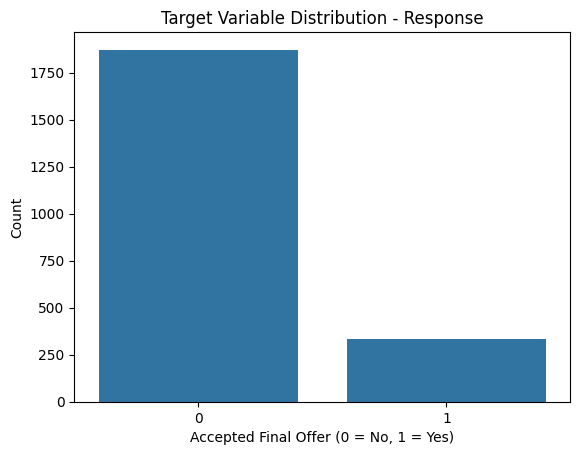

In [18]:
# Distribution of target variable - Plot Type: Count Plot
sns.countplot(x='Response', data=df)
plt.title("Target Variable Distribution - Response")
plt.xlabel("Accepted Final Offer (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

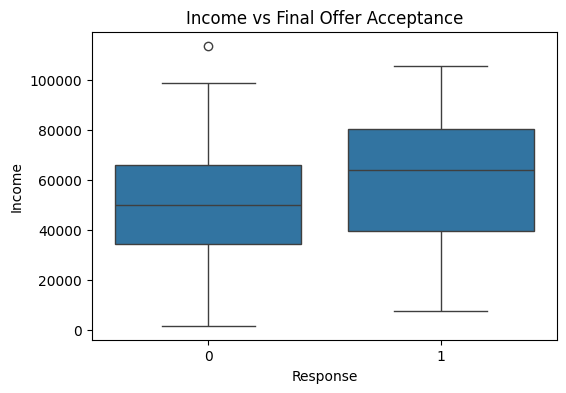

In [19]:
# Boxplot of income by response - - Plot Type: Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='Response', y='Income', data=df)
plt.title("Income vs Final Offer Acceptance")
plt.xlabel("Response")
plt.ylabel("Income")
plt.show()

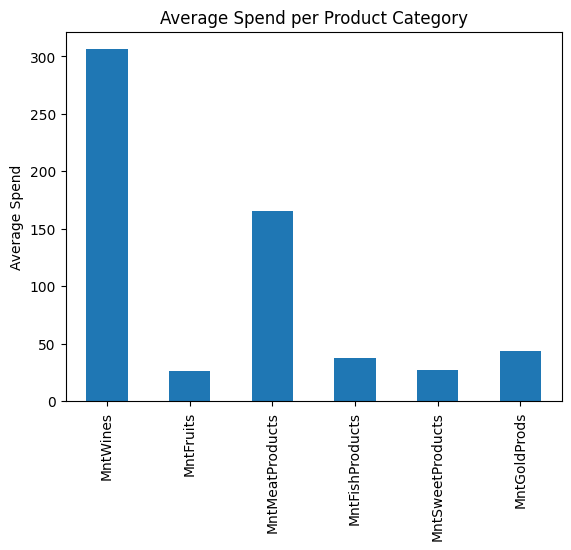

In [20]:
# Average spend on product categories - Plot Type: Bar Chart
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds']
df[product_columns].mean().plot(kind='bar', title='Average Spend per Product Category')
plt.ylabel("Average Spend")
plt.show()

- ✅ The best Random Forest model uses `max_depth=7` and `n_estimators=50`, balancing performance and complexity.
- 📊 It achieved a strong cross-validation accuracy of **87.75%**, meaning it generalizes well across different data splits.
- ⚖️ This setup avoids overfitting while still capturing meaningful patterns in customer behavior.


In [32]:
accuracy_scores = []
for i in range(1, 8):
    for j in range(1, 150):
        model = RandomForestClassifier(random_state=42, max_depth=7, n_estimators=50)
        model.fit(X_train, y_train)
        accuracy = model.score(X_test, y_test)
        accuracy_scores.append([i, j, accuracy])


In [43]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 9]
}

In [44]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END .......................max_depth=3, n_estimators=50; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=50; total time=   0.0s
[CV] END .......................max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ......................max_depth=3, n_estimators=150; total time=   0.1s
[CV] END ......................max_depth=3, n_estimators=150; total time=   0.1s
[CV] END ......................max_depth=3, n_estimators=150; total time=   0.1s
[CV] END ......................max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ......................max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ......................max_depth=3, n_es

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [3, 5, ...], 'n_estimators': [50, 100, ...]}"
,scoring,None
,n_jobs,1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [45]:
best = grid_search.best_estimator_
y_pred = best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8746223564954683


In [ ]:
accuracy_score(y_test, model.predict(X_test))

0.8731117824773413

In [29]:
classification_report(y_test, model.predict(X_test))

'              precision    recall  f1-score   support\n\n           0       0.88      0.99      0.93       559\n           1       0.79      0.25      0.38       103\n\n    accuracy                           0.87       662\n   macro avg       0.83      0.62      0.66       662\nweighted avg       0.86      0.87      0.84       662\n'

In [30]:
confusion_matrix(y_test, model.predict(X_test))

array([[552,   7],
       [ 77,  26]])

In [38]:
model = RandomForestClassifier(random_state=42, max_depth=7, n_estimators=50)
model.fit(X_train, y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [39]:
accuracy_score(y_test, model.predict(X_test))

0.8731117824773413

In [48]:
model = GradientBoostingClassifier(random_state=42, max_depth=7, n_estimators=50)
model.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,50
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,7
,min_impurity_decrease,0.0
,init,None


In [49]:
accuracy_score(y_test, model.predict(X_test))

0.879154078549849

In [50]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 9]
}

In [51]:
gb = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, n_jobs=1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END .......................max_depth=3, n_estimators=50; total time=   0.2s
[CV] END .......................max_depth=3, n_estimators=50; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.3s
[CV] END ......................max_depth=3, n_estimators=150; total time=   0.4s
[CV] END ......................max_depth=3, n_estimators=150; total time=   0.4s
[CV] END ......................max_depth=3, n_estimators=150; total time=   0.6s
[CV] END ......................max_depth=3, n_estimators=200; total time=   0.6s
[CV] END ......................max_depth=3, n_estimators=200; total time=   0.6s
[CV] END ......................max_depth=3, n_es

,estimator,GradientBoost...ndom_state=42)
,param_grid,"{'max_depth': [3, 5, ...], 'n_estimators': [50, 100, ...]}"
,scoring,None
,n_jobs,1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'log_loss'


In [52]:
best = grid_search.best_estimator_
y_pred = best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8851963746223565
